<a href="https://colab.research.google.com/github/krishshhah/Neural-Network/blob/main/Iris_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [54]:
# Create a model class to inherit the nn.Module

class Model(nn.Module):
  # input layer contains 4 inputs of the model
  # 1st hidden layer (l1) will have 10 neurons
  # 2nd hidden layer (l2) will have 10 neurons
  # output layer has 3 neurons to pick a flower

  def __init__(self, in_features=4, L1=10, L2=10, out_features=3):
    super().__init__() # inherites from the superclass (nn.Module)
    self.fc1 = nn.Linear(in_features, L1) #fc1 = fully connected
    self.fc2 = nn.Linear(L1, L2) # stars with input features, moving FORWARD to the next stage
    self.out = nn.Linear(L2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x)) # relu = rectified linear unit. If output<0, it is 0. if >0, then use the output
    x = F.relu(self.fc2(x)) # moves the object forward
    x = F.relu(self.out(x))

    return x

In [55]:
# Create random seed for randomisation
torch.manual_seed(41)
model = Model() # creates an instance

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [57]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url) # read from dataset
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [58]:
# replace targets/outputs with numbers
df['variety'] = df['variety'].replace('Setosa', 0.0)
df['variety'] = df['variety'].replace('Versicolor', 1.0)
df['variety'] = df['variety'].replace('Virginica', 2.0)
df

<ipython-input-58-c5651f6f32d7>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['variety'] = df['variety'].replace('Virginica', 2.0)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [59]:
#train, test, split: set features (X) and targets (y)
X = df.drop('variety', axis = 1) # selects only the targets, axis (columns)
y = df['variety']

#convert to numpy arrays
X = X.values
y = y.values

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41) #80% train, 20% test

In [61]:
X_train = torch.FloatTensor(X_train) # converts numpy arrays to floatTensors (all features are decimals)
X_test = torch.FloatTensor(X_test)

print(X_train)
print(X_test)

tensor([[5.7000, 2.6000, 3.5000, 1.0000],
        [6.5000, 2.8000, 4.6000, 1.5000],
        [4.9000, 2.5000, 4.5000, 1.7000],
        [5.5000, 2.6000, 4.4000, 1.2000],
        [6.7000, 3.0000, 5.2000, 2.3000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [6.9000, 3.1000, 5.1000, 2.3000],
        [6.4000, 3.2000, 4.5000, 1.5000],
        [6.9000, 3.1000, 5.4000, 2.1000],
        [5.9000, 3.2000, 4.8000, 1.8000],
        [6.2000, 2.9000, 4.3000, 1.3000],
        [5.7000, 2.8000, 4.5000, 1.3000],
        [5.2000, 4.1000, 1.5000, 0.1000],
        [6.5000, 3.0000, 5.8000, 2.2000],
        [6.3000, 3.4000, 5.6000, 2.4000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [6.7000, 2.5000, 5.8000, 1.8000],
        [5.1000, 2.5000, 3.0000, 1.1000],
        [4.8000, 3.0000, 1.4000, 0.3000],
        [6.2000, 2.2000, 4.5000, 1.5000],
        [6.4000, 2.7000, 5.3000, 1.9000],
        [5.8000, 2.7000, 3.9000, 1.2000],
        [7.4000, 2.8000, 6.1000, 1.9000],
        [5.2000, 3.5000, 1.5000, 0

In [62]:
y_train = torch.LongTensor(y_train) # converts numpy arrays to longTensors (all targets are integers)
y_test = torch.LongTensor(y_test)

print(y_train)
print(y_test)

tensor([1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 2, 2, 0, 2, 1, 0, 1, 2, 1, 2, 0,
        0, 2, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 1, 2, 0, 1, 1, 0, 2, 1, 0, 2, 2,
        0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 2, 2, 2, 1, 1,
        2, 0, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2,
        0, 2, 0, 1, 2, 1, 0, 2, 0, 1, 0, 2, 1, 1, 2, 1, 1, 2, 2, 0, 1, 1, 1, 2])
tensor([2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 2, 0, 0,
        1, 1, 1, 1, 0, 1])


In [63]:
# set a criterion of the model to measure the error, to measure how far off the predictions are from the actual data
criterion = nn.CrossEntropyLoss()
# choose an optimiser - using Adam optimiser, lr (learning rate) = if learning rate does not go down through each iteration, it should be lowered to learn slower
optimiser = torch.optim.Adam(model.parameters(), lr=0.01) # lower learning rate takes longer to train the model
#model.parameters() are the layers, fc1, fc2, out


In [64]:
# Train model, determining how many epochs needed. Epoch = 1 run through the entire network
epoch = 200
losses = [] # to keep track of the losses to track progress
for i in range(epoch):
  # Go forward and get prediciton
  y_pred = model.forward(X_train) # using the features to move forward and get predicitive results

  # Measure the loss
  loss = criterion(y_pred, y_train) #predicted value vs y-train value
  losses.append(loss.detach().numpy())

  if i % 10 == 0:
    print(f'{epoch}: {i} and the loss is {loss}')

  # Back propogation = take the error rate of the forward propogation and feed it back through the neural network to tweak the weights
  optimiser.zero_grad() # Clears the old gradient values, ensuring gradients from the previous iterations don’t accumulate.
  loss.backward() # Performs backpropagation to calculate the new gradients of the loss with respect to each parameter (weights)
  optimiser.step() # Uses the calculated gradients to update the model's parameters, moving them toward values that minimize the loss

200: 0 and the loss is 1.1541285514831543
200: 10 and the loss is 0.9390955567359924
200: 20 and the loss is 0.683514416217804
200: 30 and the loss is 0.4048820436000824
200: 40 and the loss is 0.23313400149345398
200: 50 and the loss is 0.13173429667949677
200: 60 and the loss is 0.0788002461194992
200: 70 and the loss is 0.054876066744327545
200: 80 and the loss is 0.0434362068772316
200: 90 and the loss is 0.03708134964108467
200: 100 and the loss is 0.03302428498864174
200: 110 and the loss is 0.03014608472585678
200: 120 and the loss is 0.027943158522248268
200: 130 and the loss is 0.026165420189499855
200: 140 and the loss is 0.024676848202943802
200: 150 and the loss is 0.023396963253617287
200: 160 and the loss is 0.022275175899267197
200: 170 and the loss is 0.021275291219353676
200: 180 and the loss is 0.020372914150357246
200: 190 and the loss is 0.01954832673072815


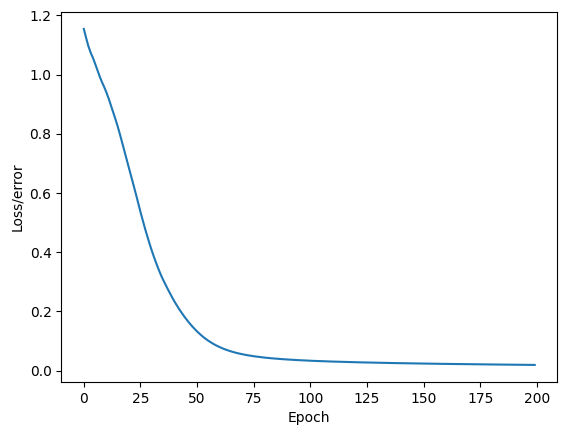

In [65]:
# Graphing out the losses
plt.plot(range(epoch), losses) # y-axis = losses
plt.ylabel("Loss/error")
plt.xlabel("Epoch")
plt.show()

In [66]:
# Evaluate deep learning results on our test data
with torch.no_grad():
   #turns off back propogation
   y_eval = model.forward(X_test) # testing the model on the new dataset, features from test set on predictions
   loss = criterion(y_eval, y_test) # find the loss error

In [67]:
loss

tensor(0.1561)

In [68]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test): #features test set
    y_val = model.forward(data) #outcome of testing

    # tells us what type of flower out network thinks it is

    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}') # compares feature test to target test

    # correct or not
    if y_val.argmax().item() == y_test[i]: # if the index of the max tensor in the feature test == target test value
      correct +=1

print (f'We got {correct} correct!')

1.) tensor([ 0.0000,  6.1342, 10.1456]) 	 2 	 2
2.) tensor([ 0.0000,  2.9859, 15.6834]) 	 2 	 2
3.) tensor([ 0.0000,  4.6679, 16.9110]) 	 2 	 2
4.) tensor([ 0.5649, 11.3049,  3.4797]) 	 1 	 1
5.) tensor([ 0.0000,  5.4529, 13.4333]) 	 2 	 2
6.) tensor([ 2.4318, 11.7448,  1.4201]) 	 1 	 1
7.) tensor([0.0000, 7.3535, 9.4482]) 	 2 	 2
8.) tensor([ 0.7166, 11.4112,  3.1820]) 	 1 	 1
9.) tensor([ 0.0000,  6.3747, 11.3769]) 	 2 	 2
10.) tensor([ 0.0000,  3.0098, 16.7956]) 	 2 	 2
11.) tensor([0.0000, 7.5389, 8.6919]) 	 2 	 2
12.) tensor([17.2000,  8.8380,  0.0000]) 	 0 	 0
13.) tensor([15.7245,  7.8127,  0.0000]) 	 0 	 0
14.) tensor([3.6054, 9.7366, 0.0000]) 	 1 	 1
15.) tensor([15.2222,  8.9336,  0.0000]) 	 0 	 0
16.) tensor([0.0000, 8.5131, 7.7683]) 	 2 	 1
17.) tensor([15.6847,  8.3980,  0.0000]) 	 0 	 0
18.) tensor([0.0000, 6.5623, 9.6368]) 	 1 	 2
19.) tensor([17.9512,  8.5064,  0.0000]) 	 0 	 0
20.) tensor([14.0649,  8.0092,  0.0000]) 	 0 	 0
21.) tensor([ 3.0712, 10.5946,  0.6115]) 	 1

In [69]:
# Allows a new flower to be passed through the model to guess which flower it is
def testing(sepal_length, sepal_width, petal_length, petal_width):
  new_iris = torch.tensor([sepal_length, sepal_width, petal_length, petal_width])
  with torch.no_grad():
    z = model(new_iris)
    z_flower = z.argmax().item()
    print(z)
    print(f'Flower guess is: {z_flower}')

    if z_flower == 0:
      print('=> Setosa')
    elif z_flower == 1:
      print('=> Versicolor')
    elif z_flower == 1:
      print('=> Virginica')


In [70]:
testing(4.7, 3.2, 1.3, 0.2)

tensor([16.6995,  8.2531,  0.0000])
Flower guess is: 0
=> Setosa


In [71]:
# saving the model
torch.save(model.state_dict(), 'my_iris_nn.pt')

In [72]:
# loading the saved model
new_model = Model()
new_model.load_state_dict(torch.load('my_iris_nn.pt'))

# making sure it loaded successfully (check instance variables)
new_model.eval()

<ipython-input-72-144700b23846>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('my_iris_nn.pt'))


Model(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=3, bias=True)
)